sub -5

In [26]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
from statsmodels.tsa.arima.model import ARIMA

In [27]:
df = pd.read_csv('C:\\Users\\DHAN RAJ\\Downloads\\btp_forecast_preprocessed_data\\kolkata\\daily\\imputed_daily_kolkata_data.csv')

In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [29]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,Toluene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),TOT-RF (mm),SR (W/mt2),VWS (m/s)
0,2021-01-01,122.910000,237.360000,44.340000,54.730000,99.080000,39.600000,12.350000,1.260000,56.180000,...,18.400000,4.520000,20.600000,18.890000,57.500000,0.480000,226.470000,0.0,50.990000,0.050000
1,2021-01-02,202.910000,352.270000,61.300000,70.560000,131.880000,43.220000,13.530000,1.700000,46.580000,...,19.630000,5.710000,22.480000,18.550000,59.870000,0.330000,264.160000,0.0,49.790000,0.040000
2,2021-01-03,201.110000,346.930000,126.600000,69.790000,196.390000,51.450000,8.110000,2.160000,43.680000,...,31.630000,8.000000,36.370000,19.070000,65.900000,0.210000,193.850000,0.0,49.870000,0.040000
3,2021-01-04,140.190000,250.070000,65.660000,65.960000,131.800000,44.010000,10.030000,1.730000,41.240000,...,26.230000,8.080000,30.920000,20.510000,64.640000,0.250000,155.850000,0.0,51.500000,0.050000
4,2021-01-05,100.690000,195.650000,48.950000,53.360000,102.310000,41.400000,10.430000,1.310000,41.560000,...,25.750000,7.920000,29.060000,21.650000,64.370000,0.280000,197.010000,0.0,51.450000,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,102.056818,192.960606,38.160069,68.198264,66.286806,57.272014,9.852222,0.885035,24.048021,...,34.589965,3.950382,8.392951,21.525972,87.669340,0.426285,274.692604,0.0,95.821181,0.046875
1091,2023-12-28,100.370486,218.356250,58.416319,64.971528,80.855903,59.050382,11.010035,1.105486,26.166146,...,43.237812,5.081667,9.463750,21.222708,86.983889,0.672535,267.221146,0.0,98.272917,0.050694
1092,2023-12-29,94.957639,181.918750,45.421875,66.207986,71.082292,60.701597,12.285451,0.921493,30.569965,...,38.746319,3.882222,8.066528,21.666319,85.071562,0.622257,298.891597,0.0,101.918750,0.057917
1093,2023-12-30,94.909722,177.154167,21.308681,65.942361,51.599653,59.268125,20.464722,0.611042,33.371840,...,25.318819,3.728021,6.948403,22.252465,76.333646,0.859514,318.645521,0.0,105.551042,0.057083


<Axes: >

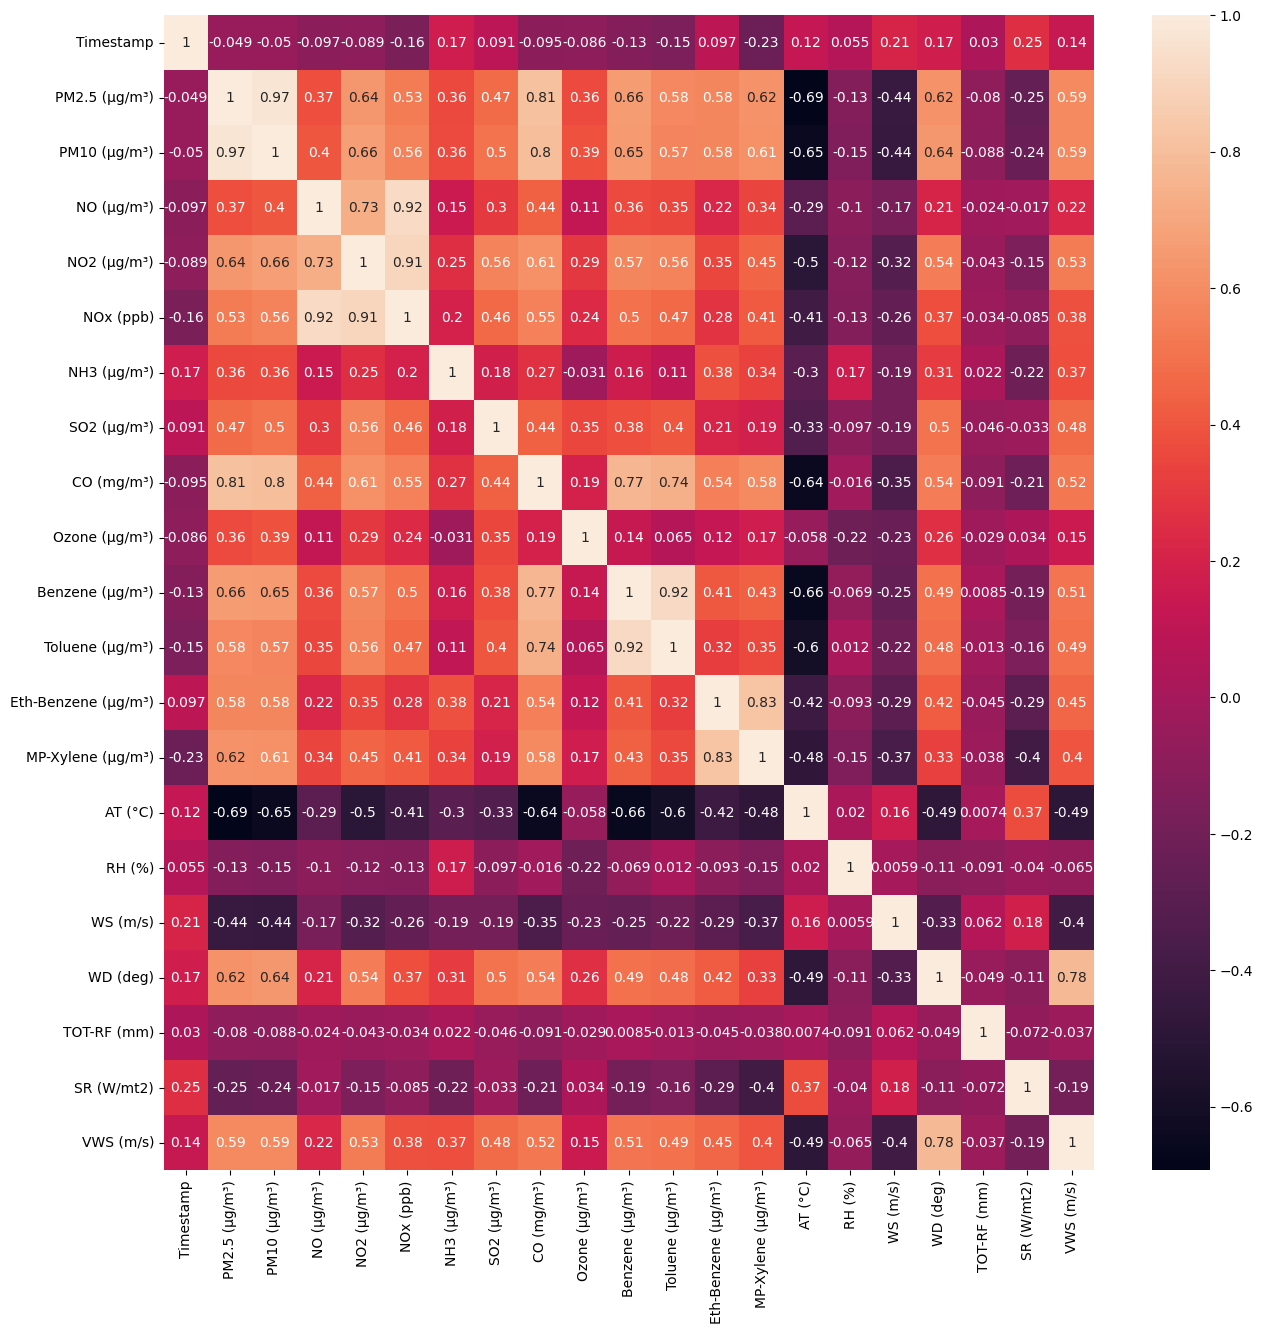

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, ax = ax)

C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\2006303399.py:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\2006303399.py:3: SettingWithCopyWarning:


A value is trying to be set o

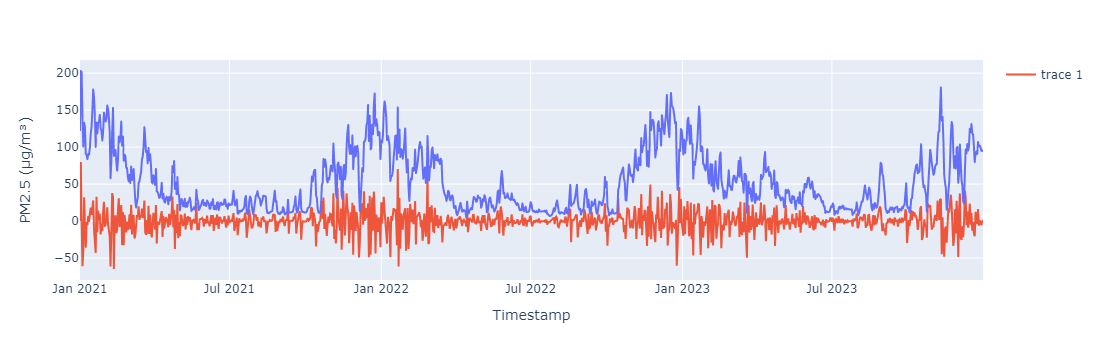

In [31]:
import plotly.express as px
df["diff"] = df['PM2.5 (µg/m³)'].diff()
df['diff'].iloc[0] = 0
fig = px.line(df,x="Timestamp",y="PM2.5 (µg/m³)")
fig.add_scatter(x=df["Timestamp"],y=df["diff"])

In [32]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
result = kpss(df['PM2.5 (µg/m³)'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: 0.16027288562202766
P-value: 0.1


C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\2995344619.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [33]:
result = adfuller(df['diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.420360
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [34]:
result = kpss(df['diff'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: 0.09269284215940087
P-value: 0.1


C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\366922649.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




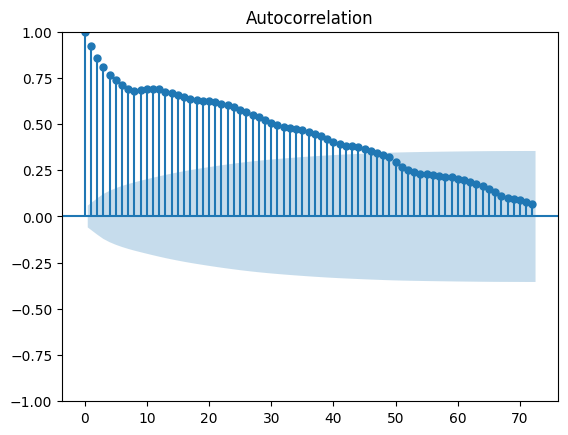

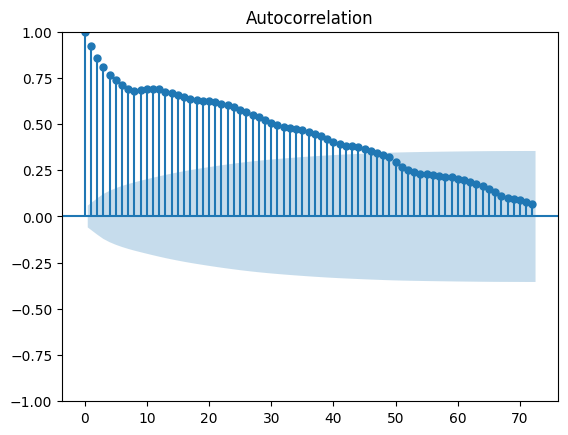

In [35]:
plot_acf(df['PM2.5 (µg/m³)'],lags=72)

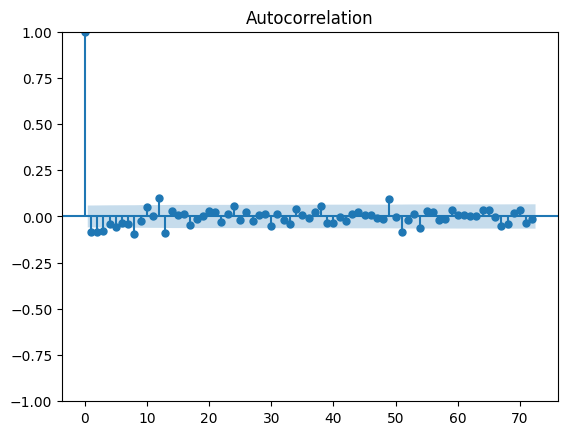

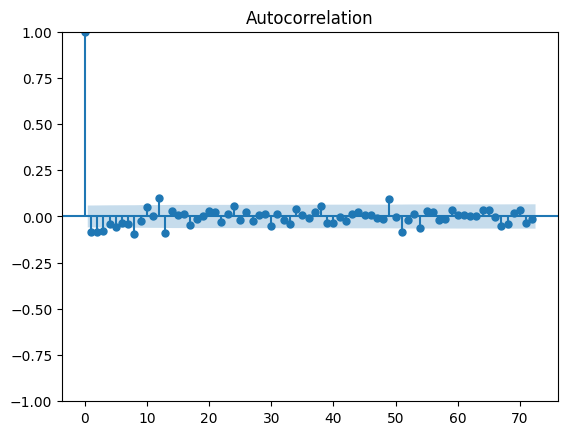

In [36]:
plot_acf(df['diff'],lags=72)

Text(0, 0.5, 'correlation')

<Figure size 1600x700 with 0 Axes>

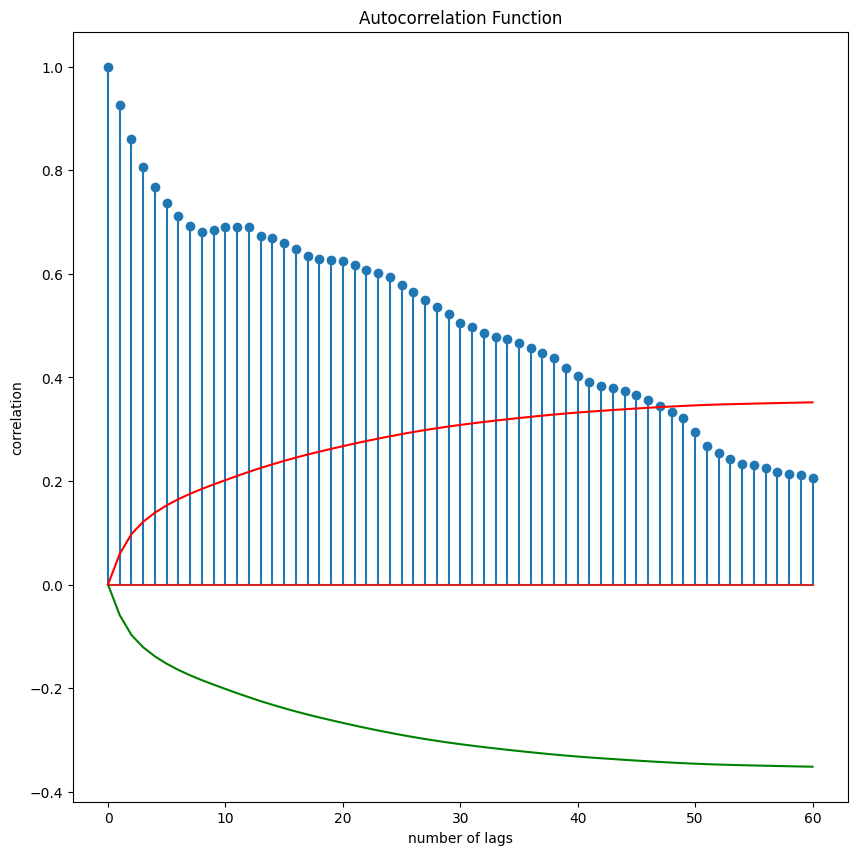

In [37]:
cf = acf(df['PM2.5 (µg/m³)'], alpha = 0.05, missing='drop',nlags=60)
plt.figure(figsize=(16, 7))
for i in range(1,len(cf[0])):
    if cf[0][i] <= cf[1][i,0] or cf[0][i] >= cf[1][i,1]:
        print(i)
        break

#Plot ACF: 
fig, ax = plt.subplots(figsize=(10, 10))
ax.stem(cf[0])
ax.plot(cf[1][:,0]-cf[0], linestyle='-',color='green')
ax.plot(cf[1][:,1]-cf[0], linestyle='-',color='red')

plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')

Text(0, 0.5, 'correlation')

<Figure size 1600x700 with 0 Axes>

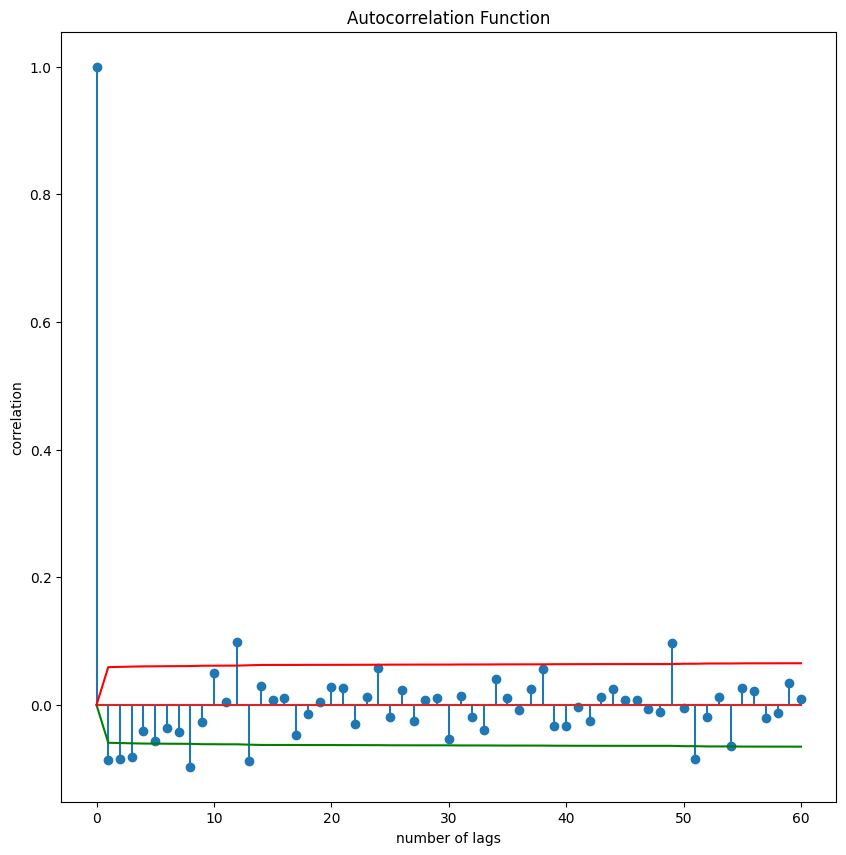

In [38]:
cf = acf(df['diff'], alpha = 0.05, missing='drop',nlags=60)
plt.figure(figsize=(16, 7))
for i in range(1,len(cf[0])):
    if cf[0][i] <= cf[1][i,0] or cf[0][i] >= cf[1][i,1]:
        print(i)
        break

#Plot ACF: 
fig, ax = plt.subplots(figsize=(10, 10))
ax.stem(cf[0])
ax.plot(cf[1][:,0]-cf[0], linestyle='-',color='green')
ax.plot(cf[1][:,1]-cf[0], linestyle='-',color='red')

plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')

In [39]:
print(cf[0][12], cf[0][40:55])

0.09907143153767727 [-0.03364567 -0.00290008 -0.02575966  0.01245385  0.02441439  0.00782297
  0.00789543 -0.00579089 -0.01143529  0.09664101 -0.00442185 -0.08411355
 -0.01878755  0.01287381 -0.06361646]


Text(0, 0.5, 'correlation')

<Figure size 1600x700 with 0 Axes>

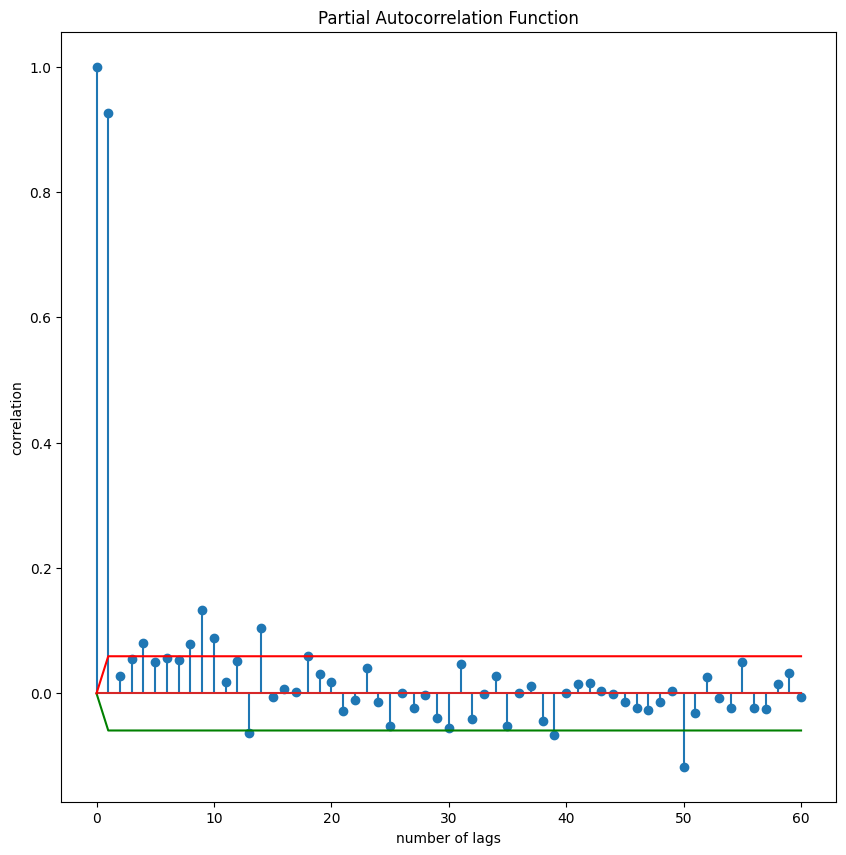

In [40]:
cf = pacf(df['PM2.5 (µg/m³)'], alpha = 0.05,nlags=60)
plt.figure(figsize=(16, 7))
for i in range(1,len(cf[0])):
    if cf[0][i] <= cf[1][i,0] or cf[0][i] >= cf[1][i,1]:
        print(i)
        break

#Plot ACF: 
fig, ax = plt.subplots(figsize=(10, 10))
ax.stem(cf[0])
ax.plot(cf[1][:,0]-cf[0], linestyle='-',color='green')
ax.plot(cf[1][:,1]-cf[0], linestyle='-',color='red')

plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')

Text(0, 0.5, 'correlation')

<Figure size 1600x700 with 0 Axes>

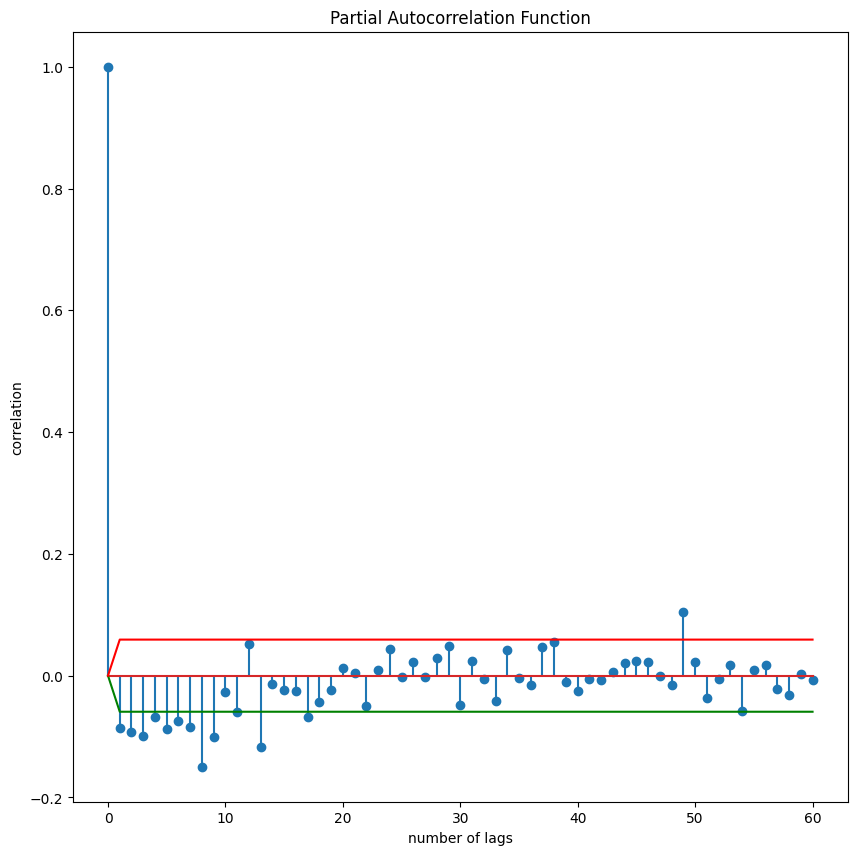

In [41]:
cf = pacf(df['diff'], alpha = 0.05,nlags=60)
plt.figure(figsize=(16, 7))
for i in range(1,len(cf[0])):
    if cf[0][i] <= cf[1][i,0] or cf[0][i] >= cf[1][i,1]:
        print(i)
        break

#Plot ACF: 
fig, ax = plt.subplots(figsize=(10, 10))
ax.stem(cf[0])
ax.plot(cf[1][:,0]-cf[0], linestyle='-',color='green')
ax.plot(cf[1][:,1]-cf[0], linestyle='-',color='red')

plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')

In [42]:
# Define the range of values for p, d, q, P, D, Q, and m
p_values = [0,1,2,3]  # Autoregressive order
d_values = [1]          # Differencing order
q_values = [0,1,2,3]  # Moving average order
P_values = [0,1,2]  # Seasonal autoregressive order
D_values = [0]  # Seasonal differencing order
Q_values = [0,1,2]  # Seasonal moving average order
m_values = [12]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None
df['PM2.5 (µg/m³)'] = df['PM2.5 (µg/m³)'].astype('float32')
# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    print(order, seasonal_order)
    try:
        model = ARIMA(df['PM2.5 (µg/m³)'], 
                               order=order, 
                               seasonal_order=seasonal_order)
        result = model.fit()
        aic = result.aic
        
        # Ensure the convergence of the model
        if not math.isinf(result.zvalues.mean()):
            print(order, seasonal_order, aic)
        
            if aic < best_aic:
                best_aic = aic
                best_params = params
                
        else:
            print(order, seasonal_order, 'not converged')

    except Exception as e:
        print(e)
        continue

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

(0, 1, 0) (0, 0, 0, 12)
(0, 1, 0) (0, 0, 0, 12) 9065.225767213638
(0, 1, 0) (0, 0, 1, 12)
(0, 1, 0) (0, 0, 1, 12) 9057.027049503758
(0, 1, 0) (0, 0, 2, 12)
(0, 1, 0) (0, 0, 2, 12) 9054.646780832833
(0, 1, 0) (1, 0, 0, 12)
(0, 1, 0) (1, 0, 0, 12) 9055.864499927115
(0, 1, 0) (1, 0, 1, 12)
(0, 1, 0) (1, 0, 1, 12) 9056.11038365952
(0, 1, 0) (1, 0, 2, 12)
(0, 1, 0) (1, 0, 2, 12) 9056.605597368478
(0, 1, 0) (2, 0, 0, 12)
(0, 1, 0) (2, 0, 0, 12) 9055.11054346299
(0, 1, 0) (2, 0, 1, 12)
(0, 1, 0) (2, 0, 1, 12) 9056.860790021248
(0, 1, 0) (2, 0, 2, 12)
(0, 1, 0) (2, 0, 2, 12) 9052.615591344009
(0, 1, 1) (0, 0, 0, 12)
(0, 1, 1) (0, 0, 0, 12) 9056.635514484358
(0, 1, 1) (0, 0, 1, 12)
(0, 1, 1) (0, 0, 1, 12) 9049.77940486448
(0, 1, 1) (0, 0, 2, 12)
(0, 1, 1) (0, 0, 2, 12) 9047.584279352615
(0, 1, 1) (1, 0, 0, 12)
(0, 1, 1) (1, 0, 0, 12) 9048.759491985766
(0, 1, 1) (1, 0, 1, 12)
(0, 1, 1) (1, 0, 1, 12) 9048.728200686237
(0, 1, 1) (1, 0, 2, 12)
(0, 1, 1) (1, 0, 2, 12) 9049.569420822347
(0, 1, 1) (2,

C:\Users\DHAN RAJ\miniconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



(0, 1, 2) (2, 0, 2, 12) 9033.934165722818
(0, 1, 3) (0, 0, 0, 12)
(0, 1, 3) (0, 0, 0, 12) 9020.722460663044
(0, 1, 3) (0, 0, 1, 12)
(0, 1, 3) (0, 0, 1, 12) 9015.39210319733
(0, 1, 3) (0, 0, 2, 12)
(0, 1, 3) (0, 0, 2, 12) 9012.160096398904
(0, 1, 3) (1, 0, 0, 12)
(0, 1, 3) (1, 0, 0, 12) 9014.419787878374
(0, 1, 3) (1, 0, 1, 12)
(0, 1, 3) (1, 0, 1, 12) 9013.96778625275
(0, 1, 3) (1, 0, 2, 12)
(0, 1, 3) (1, 0, 2, 12) 9014.158312782129
(0, 1, 3) (2, 0, 0, 12)
(0, 1, 3) (2, 0, 0, 12) 9012.542496558966
(0, 1, 3) (2, 0, 1, 12)


KeyboardInterrupt: 

In [ ]:
model = ARIMA(df['PM2.5 (µg/m³)'], order=best_params[:3], seasonal_order=best_params[3:])
result = model.fit()
a = result.get_forecast(steps=31)
y_h = a.predicted_mean
y_l= a.conf_int(alpha=0.05) 
print(y_h)
print(y_l)

In [73]:
val = pd.read_excel("C:/Users/DHAN RAJ/Downloads/Kolkata_daily_Jan.xlsx")

In [74]:
origin = '2021-01-01'
start = '2024-01-01'
end = '2024-01-31'
time_period = pd.date_range(start,end,freq='D')
val['From Date'] = time_period
val.index = time_period

In [75]:
val['PM2.5']

2024-01-01    102.58
2024-01-02     97.01
2024-01-03     93.04
2024-01-04    105.41
2024-01-05    119.15
2024-01-06    112.77
2024-01-07    125.58
2024-01-08    127.41
2024-01-09    109.73
2024-01-10    111.51
2024-01-11    110.29
2024-01-12    103.24
2024-01-13    123.00
2024-01-14    158.87
2024-01-15    139.88
2024-01-16    116.59
2024-01-17     99.03
2024-01-18    103.19
2024-01-19     91.11
2024-01-20    124.94
2024-01-21    147.98
2024-01-22    137.20
2024-01-23    132.69
2024-01-24    112.50
2024-01-25    109.74
2024-01-26    129.29
2024-01-27     98.85
2024-01-28    115.18
2024-01-29     98.28
2024-01-30     69.20
2024-01-31     58.32
Freq: D, Name: PM2.5, dtype: float64

Text(0, 0.5, 'PM2.5 (µg/m³)')

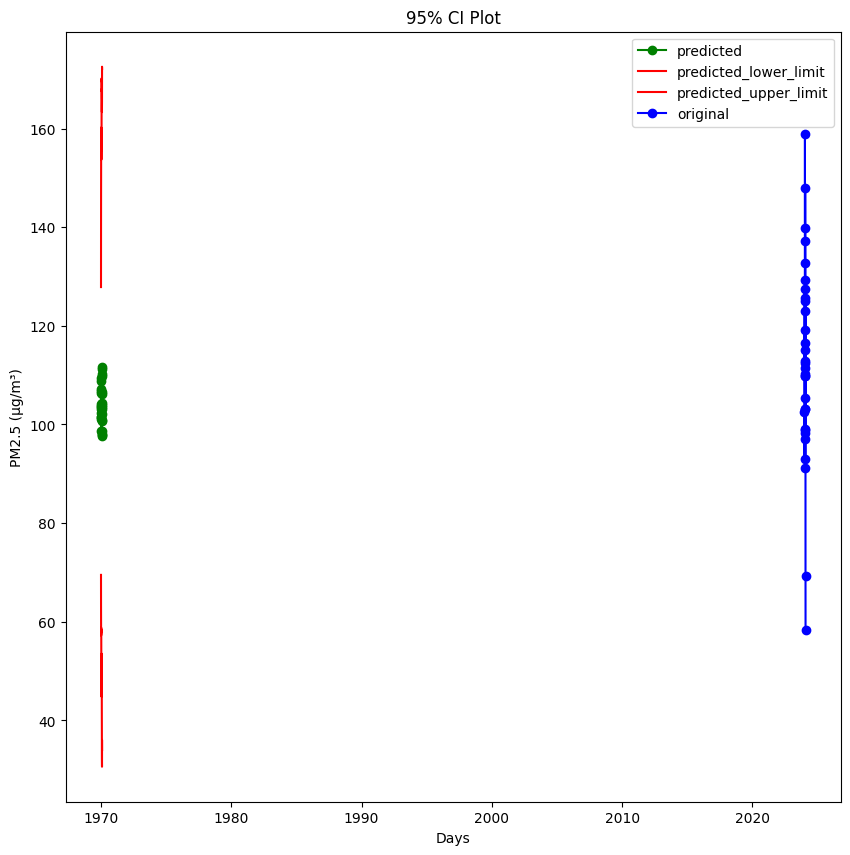

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(y_h.reset_index(drop=True), marker="o",color = 'green',label='predicted')
ax.plot(y_l['lower PM2.5 (µg/m³)'].reset_index(drop=True), linestyle='-',color='red',label='predicted_lower_limit')
ax.plot(y_l['upper PM2.5 (µg/m³)'].reset_index(drop=True), linestyle='-',color='red',label='predicted_upper_limit')
ax.plot(val['PM2.5'], marker="o",color = 'blue',label='original',)
ax.legend()
plt.title('95% CI Plot')
plt.xlabel('Days')
plt.ylabel('PM2.5 (µg/m³)')

In [87]:
tot = pd.DataFrame()
df.set_index('Timestamp',inplace=True)
tot['PM2.5 (µg/m³)'] = pd.concat([df['PM2.5 (µg/m³)'],val['PM2.5']], axis = 0)

In [88]:
a

1970-01-01   NaN
Freq: D, Name: PM2.5 (µg/m³), dtype: float32

In [93]:
tot['Timestamp'] = np.concatenate([df.index,val.index], axis = 0)

In [94]:
tot.set_index('Timestamp', inplace=True)

In [95]:
tot

,PM2.5 (µg/m³)
Timestamp,
2021-01-01,122.910004
2021-01-02,202.910004
2021-01-03,201.110001
2021-01-04,140.190002
2021-01-05,100.690002
...,...
2024-01-27,98.850000
2024-01-28,115.180000
2024-01-29,98.280000


In [96]:
y_preds = []
ts = tot.loc[origin:end]['PM2.5 (µg/m³)'].asfreq("D")
for today in time_period.shift(-1):
    model = ARIMA(ts[origin:today], order=best_params[:3], seasonal_order=best_params[3:])
    result = model.fit()
    y_pred = result.forecast()[0]
    y_preds.append(y_pred)
y_preds = pd.Series(y_preds, index=time_period)
mae = (y_preds - ts[start:end]).abs().mean()

C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\1296550175.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\1296550175.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\1296550175.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_26408\1296550175.py:6: FutureWarning:

Se

In [97]:
mae

14.047816267513603

In [98]:
y_preds

2024-01-01     95.010189
2024-01-02    102.035341
2024-01-03     99.583712
2024-01-04     93.162884
2024-01-05    106.161998
2024-01-06    117.532117
2024-01-07    108.643031
2024-01-08    122.881273
2024-01-09    124.263597
2024-01-10    108.532031
2024-01-11    112.139723
2024-01-12    112.874316
2024-01-13    103.984039
2024-01-14    119.915264
2024-01-15    151.658412
2024-01-16    132.284409
2024-01-17    114.978463
2024-01-18    107.091232
2024-01-19    110.029295
2024-01-20     97.259139
2024-01-21    123.814837
2024-01-22    142.425896
2024-01-23    128.380095
2024-01-24    128.244979
2024-01-25    117.076388
2024-01-26    115.543362
2024-01-27    129.546439
2024-01-28    101.025892
2024-01-29    115.905449
2024-01-30    103.583282
2024-01-31     74.923291
Freq: D, dtype: float64

In [43]:
original = [102.58,97.01,93.04,105.41,119.15,112.77,125.58,127.41,109.73,111.51,110.29,103.24,123.00,158.87,139.88,116.59,99.03,103.19,91.11,124.94,147.98,137.20,132.69,112.50,109.74,129.29,98.85,115.18,98.28,69.20,58.32]
y_preds = [98.667809,104.357949,100.408148,94.683503,107.578107,115.346593,113.247139,123.537051,121.980903,104.354862,110.135940,110.235948,103.584595,117.219598,149.936543,132.827528,117.190721,104.840974,106.663168,94.652006,122.527756,140.333526,132.893883,127.517923,113.164693,109.592252,124.249592,100.165488,114.219733,104.063108,75.502066]

Text(0, 0.5, 'PM 2.5 Concentration in Kolkata')

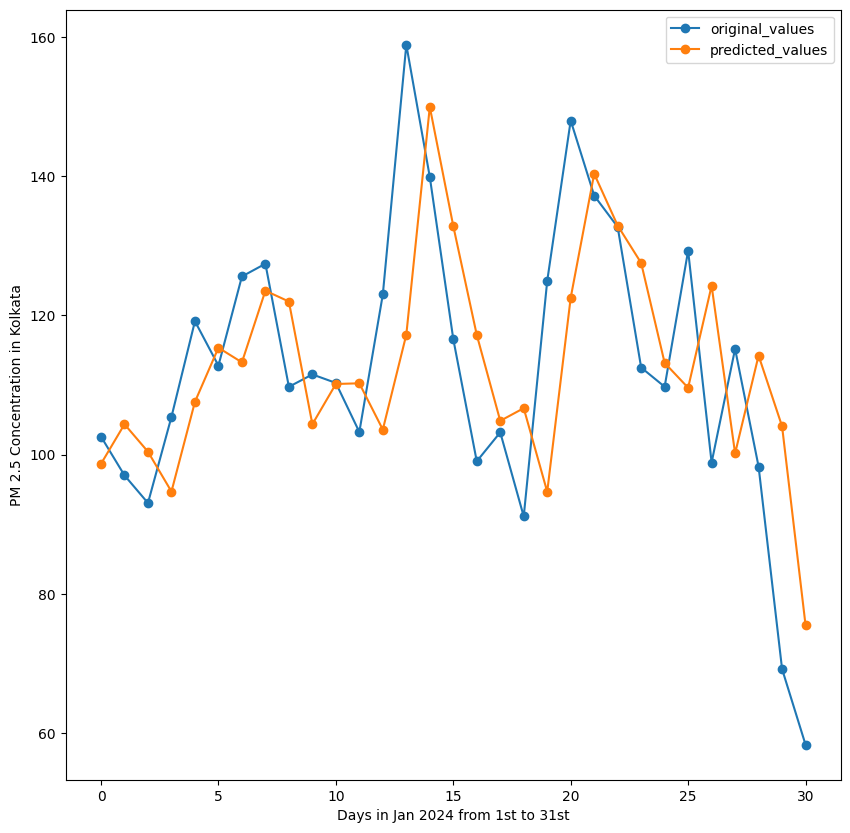

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(original,label='original_values',marker='o')
ax.plot(y_preds,label='predicted_values',marker='o')
mae -= 5
ax.legend()
plt.xlabel('Days in Jan 2024 from 1st to 31st')
plt.ylabel('PM 2.5 Concentration in Kolkata')

Text(0.5, 1.0, 'Time Series Forecasting')

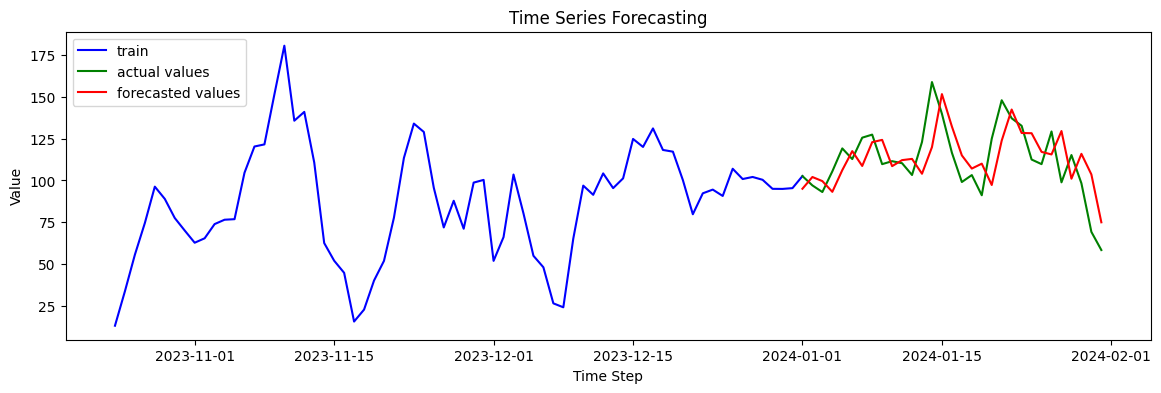

In [100]:
#set the size of the plot 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 4] 
test_data_ = pd.concat([df['PM2.5 (µg/m³)'],val['PM2.5']])
test_data_.columns = 'PM2.5 (µg/m³)'
#Test data
plt.plot(test_data_.index[-100:-30], test_data_[-100:-30], label = "train", color = "b") 


#the historical data used as input for forecasting
plt.plot(time_period, val['PM2.5'], label='actual values', color='green') 

# plotting the forecasted values
plt.plot(val.index, y_preds, label='forecasted values', color='red') 

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Forecasting')

In [ ]:
mae